WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Group 1 mean, Group 2 mean, alpha_group1, alpha_group2, Group 1 SD, Group 2 SD]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 69 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


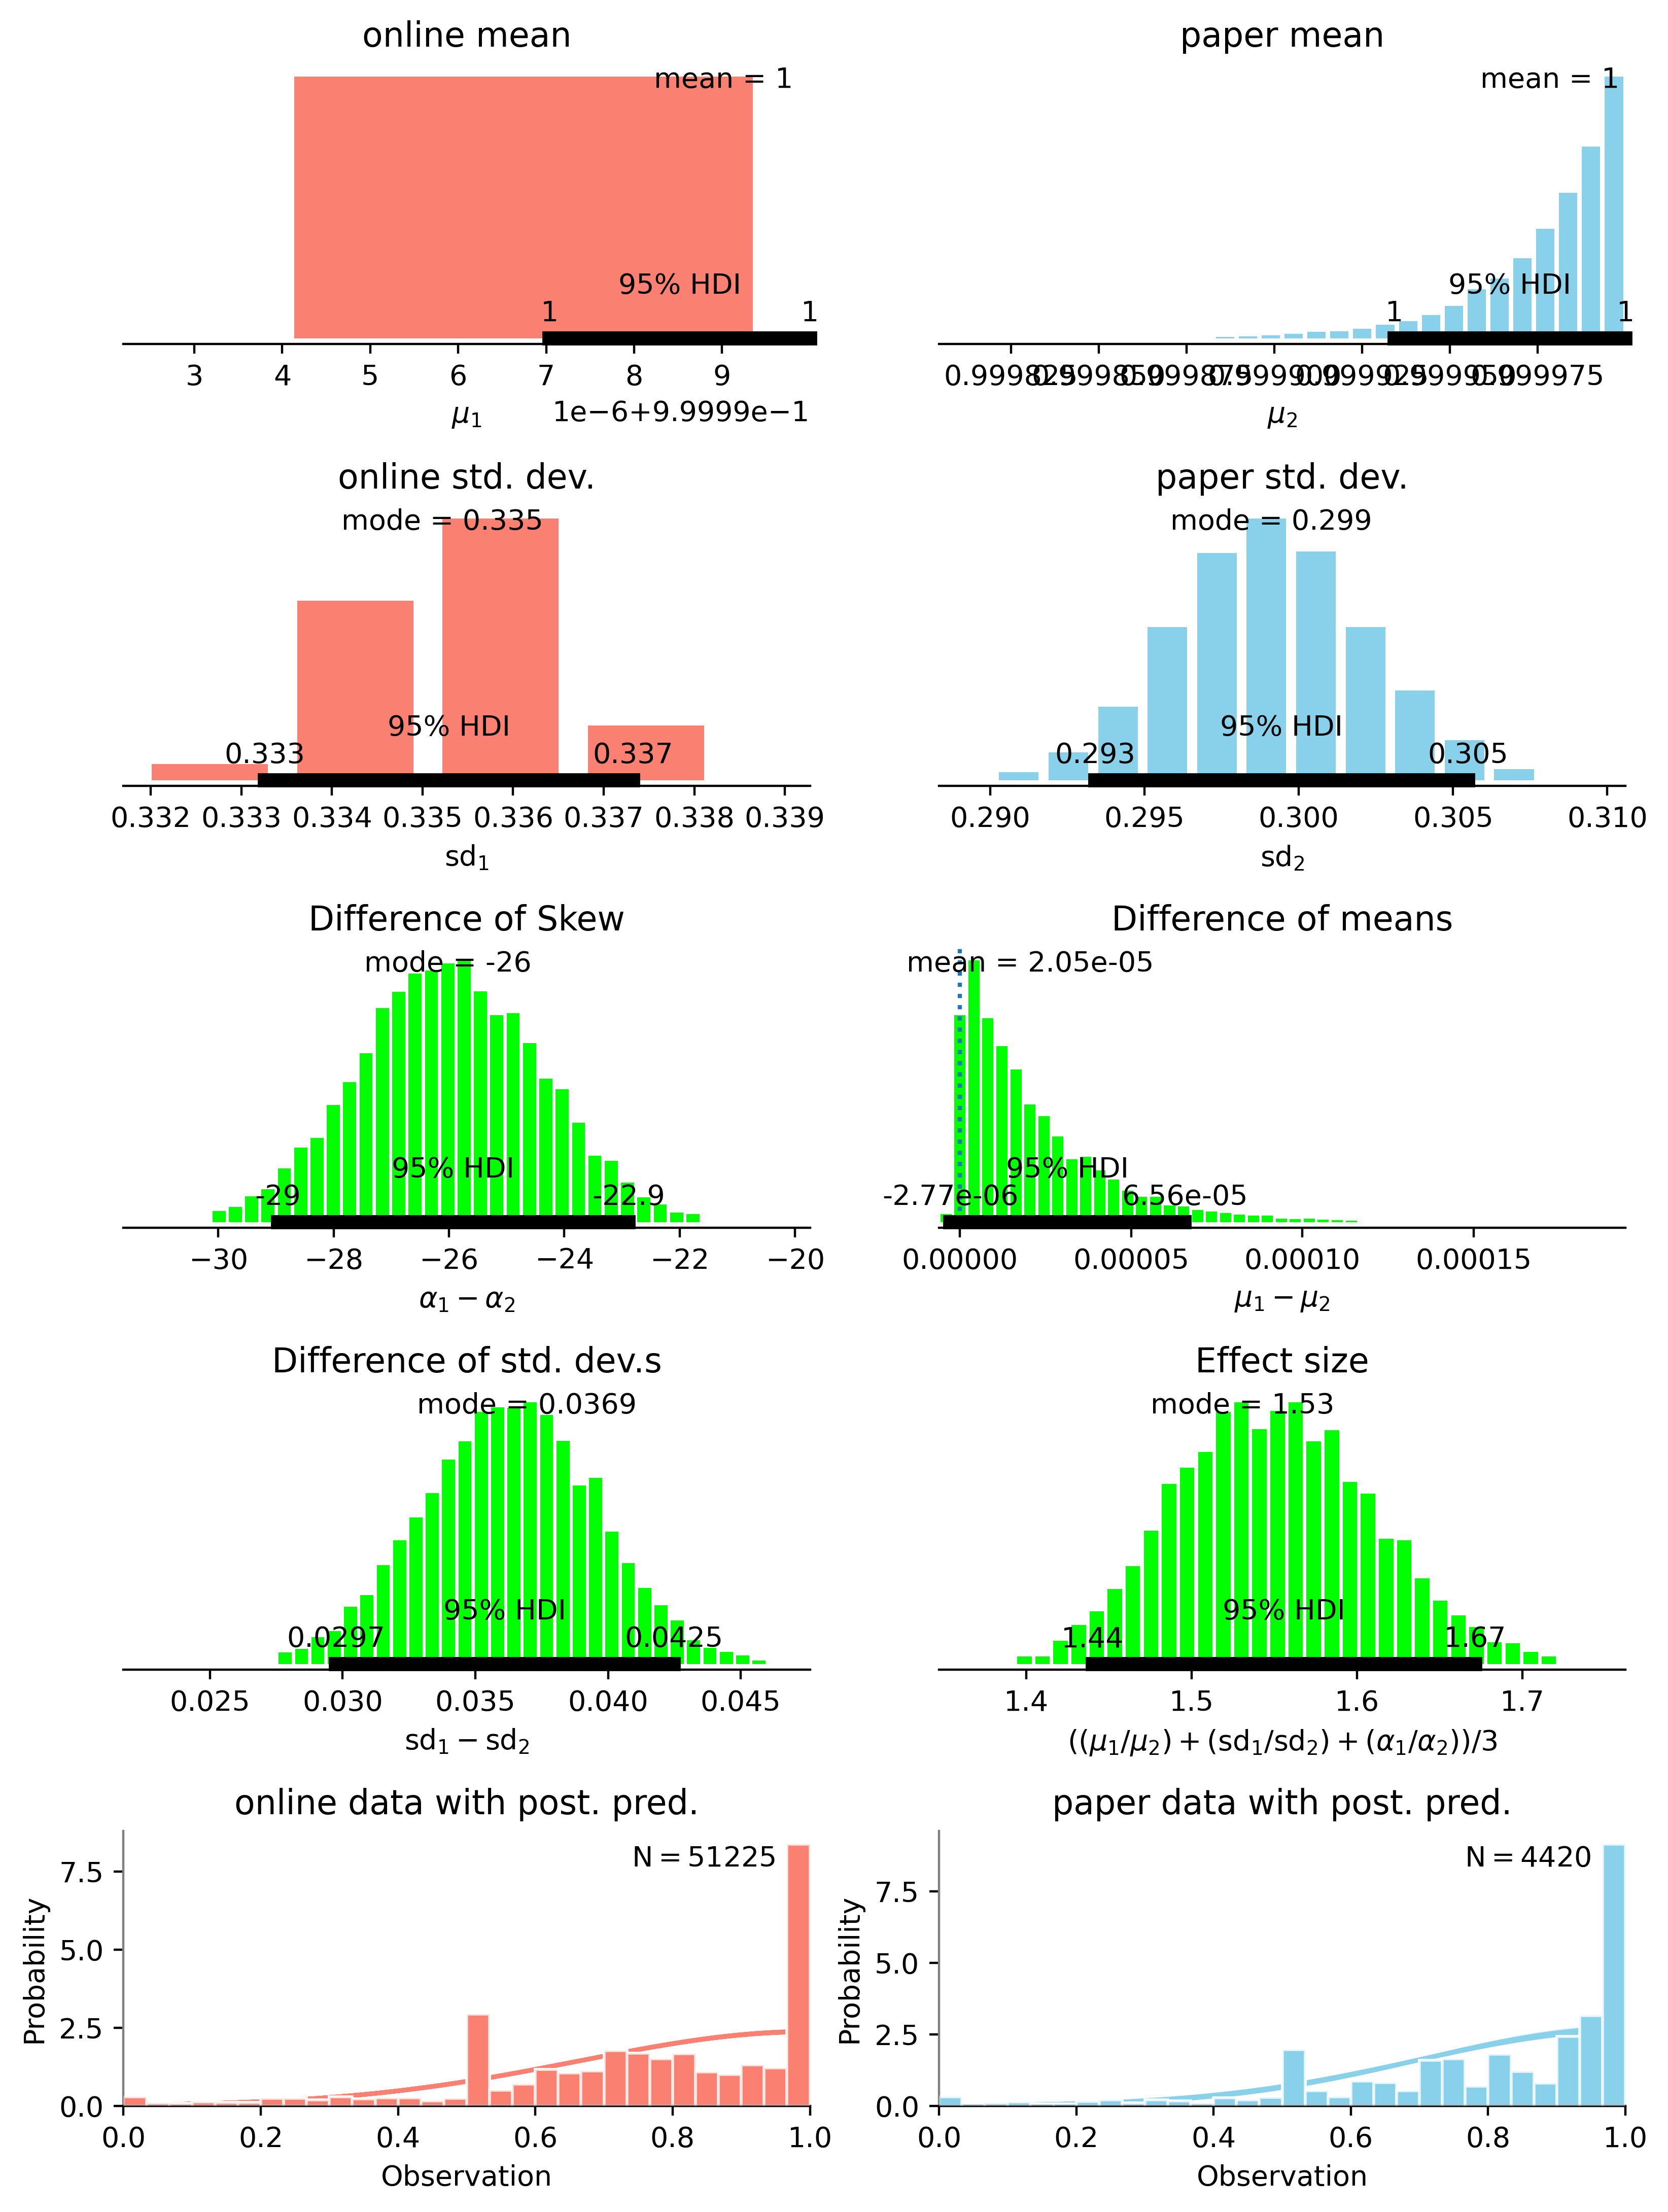

In [1]:
from bayes_test import BayesianHypothesisTestTruncSkewNormal
import pandas as pd
import numpy as np

draws = 2000

online = np.load('online_distinctiveness.npy')

paper = np.load('paper_distinctiveness.npy')


df1 = pd.DataFrame({'value' : paper})
df2 = pd.DataFrame({'value' : online})
df1['del_type'] = 'paper'
df2['del_type'] = 'online'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTestTruncSkewNormal(df=df,
                                   group1_name='online',
                                   group2_name='paper',
                                   value_column='value',
                                   category_column='del_type',
                                   lower=0,
                                   upper=1)
study_test.run_model(draws)
study_test.plot_results()

In [3]:
study_test.cliff_delta()
study_test.non_overlap_effect_size()
study_test.divergence_effect_size()
study_test.value_storage

Sampling: [Group 1 data, Group 2 data]


{'Group 1 mean': {'mean': 0.9999990246229497,
  'hdi_min': 0.9999969474776349,
  'hdi_max': 0.9999999994942634},
 'Group 2 mean': {'mean': 0.9999782381857472,
  'hdi_min': 0.9999331674251141,
  'hdi_max': 0.9999999991113999},
 'Group 1 SD': {'mode': 0.3352431618668701,
  'hdi_min': 0.3333807591220097,
  'hdi_max': 0.3374860045736645},
 'Group 2 SD': {'mode': 0.29946985317347063,
  'hdi_min': 0.2930930081303675,
  'hdi_max': 0.30542524199431587},
 'Difference of Skew': {'mode': -26.40079303597122,
  'hdi_min': -29.002045465670562,
  'hdi_max': -22.945794824188884},
 'Difference of means': {'mean': 2.0806875858849583e-05,
  'hdi_min': -3.1604301403698187e-06,
  'hdi_max': 6.662120901945734e-05},
 'Difference of SDs': {'mode': 0.036374204916135494,
  'hdi_min': 0.03008860011941522,
  'hdi_max': 0.04306445155491856},
 'Effect size': {'mode': 1.5440173716453953,
  'hdi_min': 1.439730508880678,
  'hdi_max': 1.6705542568639378},
 'cliff_delta': {'cliff_delta': 0.5383975624},
 'non_overlap_eff